#Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Load the Dataset

In [3]:
df = pd.read_csv("Loan_default.csv")

#Visualization key features

#loan Amount Distribution

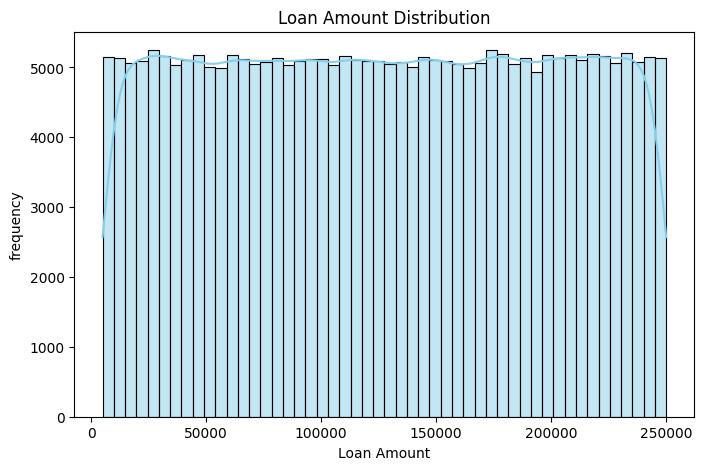

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="LoanAmount", bins=50, kde=True, color="skyblue")
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('frequency')
plt.show()

#Income Distribution

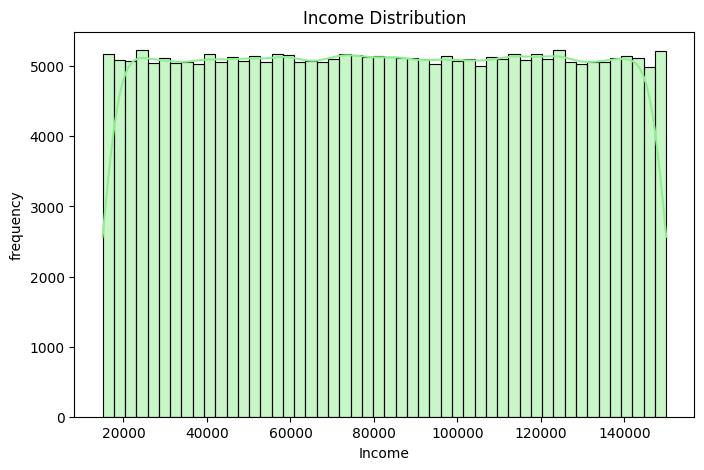

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Income", bins=50, kde=True, color="lightgreen")
plt.title("Income Distribution")
plt.xlabel('Income')
plt.ylabel('frequency')
plt.show()

#Income by Education (Boxplot)

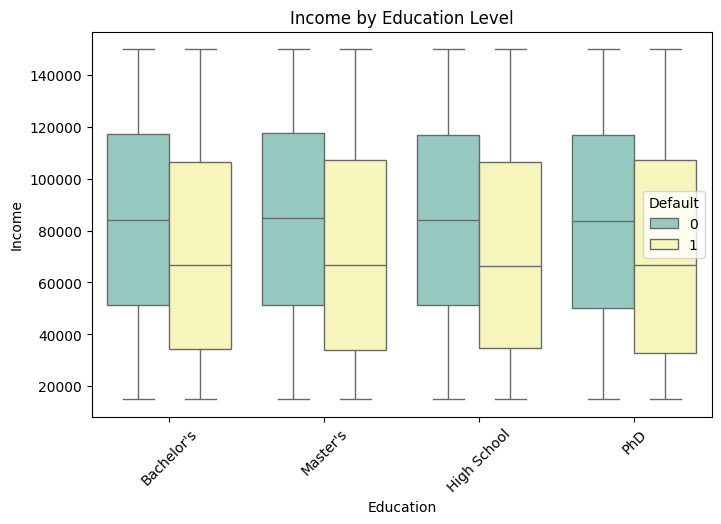

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Education", y="Income", hue="Default", palette="Set3")
plt.title("Income by Education Level")
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

#Loan Amount by Education (Boxplot)

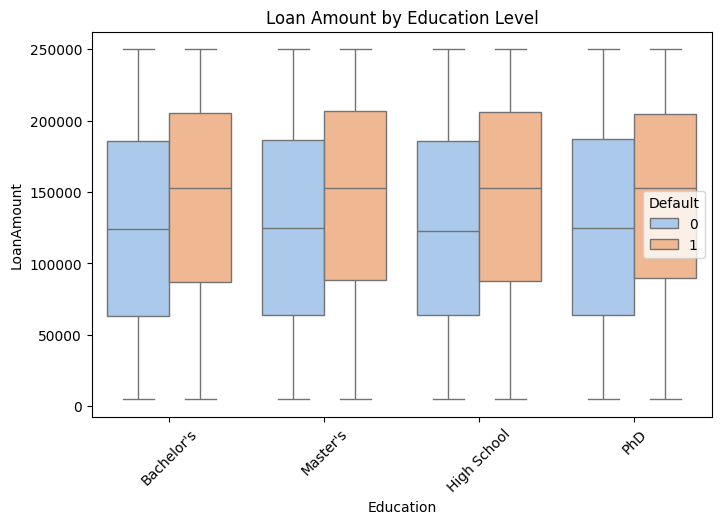

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Education", y="LoanAmount",hue="Default", palette="pastel")
plt.title("Loan Amount by Education Level")
plt.xlabel('Education')
plt.ylabel('LoanAmount')
plt.xticks(rotation=45)
plt.show()

#Hadeling the Catagorical Varaibles

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('LoanID')

le = LabelEncoder()
for cols in categorical_cols:
    df[cols] = le.fit_transform(df[cols])

In [12]:
X = df.drop(columns=["LoanID", "Default"])
y = df["Default"]

#Train-Test-Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Train Model

#Logistic Model

In [22]:
model_1 = LogisticRegression(max_iter=2000)
model_1.fit(X_train, y_train)

C:\Users\MSS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


#DecisionTree Model

In [15]:
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#Check accuray of model

#Check Accuracy of logistic model

In [16]:
y1_pred = model_1.predict(X_test)
accuracy1 = accuracy_score(y_test, y1_pred)
print("Accuracy for Model 1 :", accuracy1)

Accuracy for Model 1 : 0.8850988838848639


#Check accuray for Decision Tree Model

In [17]:
y2_pred = model_2.predict(X_test)
accuracy2 = accuracy_score(y_test, y2_pred)
print("Accuracy for Model 2 :", accuracy2)

Accuracy for Model 2 : 0.8034070883101625


#Confusion Matrix

#Confusion matrix for model 1

In [18]:
cm_1 = confusion_matrix(y_test, y1_pred)

#Visualize the confusion matrix for model 1

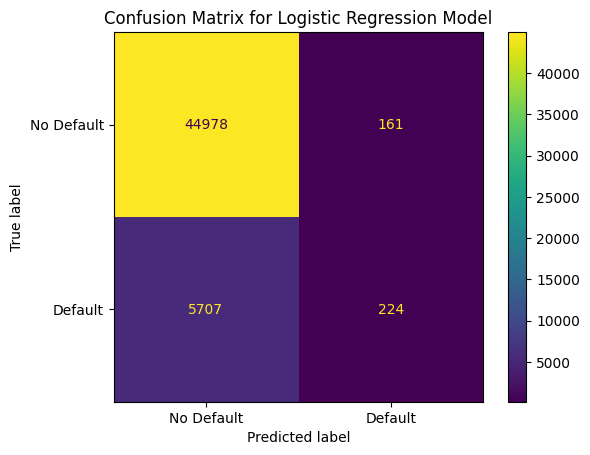

In [19]:
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=["No Default", "Default"])
disp_1.plot()
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

#Confusion matrix for model 2

In [20]:
cm_2 = confusion_matrix(y_test, y2_pred)

#Visualize the confusion matrix for model 1

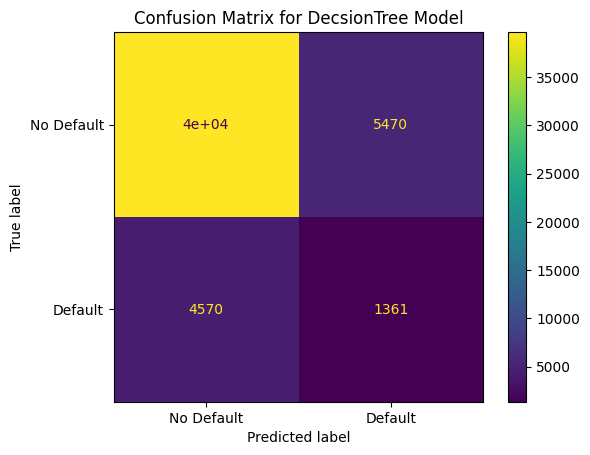

In [21]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=["No Default", "Default"])
disp_2.plot()
plt.title('Confusion Matrix for DecsionTree Model')
plt.show()